In [1]:
from utils.tf import *
from utils.db import *
from utils.gd import * 
from utils.clt_repetidos import *
from datetime import datetime
import cx_Oracle
import pandas as pd
import os
from rapidfuzz import process, fuzz
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn
import json

from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file 
#from .autonotebook import tqdm as notebook_tqdm
#import dtale 

/home/ale1726/proyects/datalake/myenv_1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_productos = pd.read_csv("/home/ale1726/proyects/datalake/clientes/data/productos/SIRAC/data/06_02_2025/productos_clientes_SIRAC.dat", low_memory=False)

In [8]:
df_sirac = pd.read_csv("/home/ale1726/proyects/datalake/clientes/data/ETL/CLientesT_SIRAC.csv")

In [9]:
report = ProfileReport(df_sirac, title='My Data')
report.to_file("my_report_sirac.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 23.34it/s]


In [ ]:
df_sirac

In [ ]:
# Generar el informe de perfilado de datos

#report = ProfileReport(df_productos, title='My Data')
#report.to_file("my_report2.html")

#import pygwalker as pyg 
#pyg.walk
#dtale.show(df_productos.head(5))
# 

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]


In [86]:
res1 = df_productos[df_productos["AÑO_VENCIMIENTO"] == 2264]

In [48]:
df_productos.loc[df_productos["AÑO_VENCIMIENTO"] == 2264, "FECHA_VENCIMIENTO"] = datetime(2031, 7, 31)
df_productos.loc[df_productos["AÑO_VENCIMIENTO"] == 2264, "MES_VENCIMIENTO"] = 7
df_productos.loc[df_productos["AÑO_VENCIMIENTO"] == 2264, "DIA_VENCIMIENTO"] = 31   
df_productos.loc[df_productos["AÑO_VENCIMIENTO"] == 2264, "AÑO_VENCIMIENTO"] = 2031


In [75]:
res = df_productos[(df_productos["AÑO_VENCIMIENTO"] == 2025) & (df_productos["MES_VENCIMIENTO"] == 2)]

/tmp/ipykernel_20929/3474242286.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["FECHA_VENCIMIENTO"] = pd.to_datetime(res["FECHA_VENCIMIENTO"])


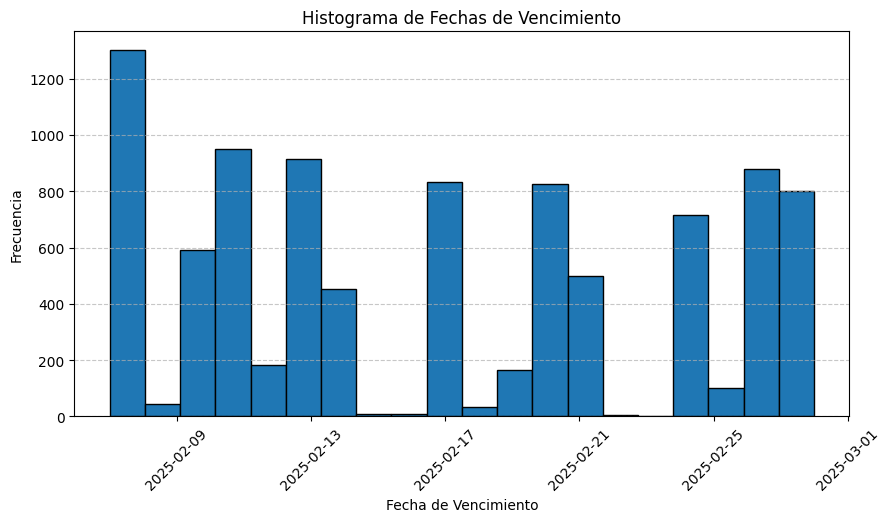

In [76]:
import matplotlib.pyplot as plt
import pandas as pd



# Convertir la columna a formato datetime por si no lo está
res["FECHA_VENCIMIENTO"] = pd.to_datetime(res["FECHA_VENCIMIENTO"])

# Crear el histograma
plt.figure(figsize=(10, 5))
plt.hist(res["FECHA_VENCIMIENTO"], bins=20, edgecolor="black")
plt.xlabel("Fecha de Vencimiento")
plt.ylabel("Frecuencia")
plt.title("Histograma de Fechas de Vencimiento")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()


## AGRUPADO AÑO CONTRATACIÓN Y CONTRATOS  

In [155]:
agrupado_año_contratos = (
    df_productos.groupby(["AÑO_REGISTRO"], as_index=False)
    .agg(
        numero_contratos = ("NUMERO_CONTRATO", "count"),
        suma_plazo = ("PLAZO", "sum"),
        plazo_promedio = ("PLAZO", lambda x: round(x.mean())),
        maximo = ("PLAZO", 'max'),
        minimo = ("PLAZO", 'min') 
    ).assign(plazo_promedio_ponderado = lambda df: round(df['suma_plazo'] / df['numero_contratos']))
).sort_values("AÑO_REGISTRO")

In [156]:
agrupado_año_contratos

,AÑO_REGISTRO,numero_contratos,suma_plazo,plazo_promedio,maximo,minimo,plazo_promedio_ponderado
0,2007,1,7160.0,7160,7160.0,7160.0,7160.0
1,2008,6,40453.0,6742,7195.0,6117.0,6742.0
2,2009,10,67631.0,6763,7193.0,6221.0,6763.0
3,2010,8,50988.0,6374,7224.0,5425.0,6374.0
4,2011,3,19484.0,6495,7104.0,6187.0,6495.0
5,2012,4,26624.0,6656,7202.0,6060.0,6656.0
6,2013,17,77883.0,5192,7188.0,4761.0,4581.0
7,2014,12,60929.0,5077,7258.0,4443.0,5077.0
8,2015,26,139678.0,5372,7283.0,3390.0,5372.0
9,2016,82,518858.0,6328,7951.0,3040.0,6328.0


In [24]:
agrupado_año_contratos.to_csv("/home/ale1726/proyects/datalake/clientes/data/productos/SIRAC/data/06_02_2025/agrupados/agrupado_año_contratos.csv",index=False)

In [ ]:
agrupado_año_mes_contratos = (
    df_productos.groupby(["AÑO_REGISTRO","MES_REGISTRO"], as_index=False)
    .agg(
        numero_contratos = ("NUMERO_CONTRATO", "count"),
        plazo_promedio = ("PLAZO", lambda x: round(x.mean()) if not x.isna().all() else 0 ),
        maximo = ("PLAZO", 'max'),
        minimo = ("PLAZO", 'min') 
    )
).sort_values(["AÑO_REGISTRO","MES_REGISTRO"])

In [49]:
agrupado_año_mes_contratos = agrupado_año_mes_contratos.dropna()

In [50]:
agrupado_año_mes_contratos.to_csv("/home/ale1726/proyects/datalake/clientes/data/productos/SIRAC/data/06_02_2025/agrupados/agrupado_año_mes_contratos.csv",index=False)

In [83]:
agrupado_año_mes_contratos[agrupado_año_mes_contratos["AÑO_REGISTRO"]==2024]

,AÑO_REGISTRO,MES_REGISTRO,numero_contratos,plazo_promedio,maximo,minimo
136,2024,1,118,1408,2168.0,576.0
137,2024,2,80,1524,5456.0,360.0
138,2024,3,88,1379,1843.0,328.0
139,2024,4,157,1423,2046.0,305.0
140,2024,5,126,1367,2979.0,269.0
141,2024,6,149,1337,5452.0,236.0
142,2024,7,183,1219,4930.0,196.0
143,2024,8,1928,262,3261.0,161.0
144,2024,9,3568,225,2529.0,57.0
145,2024,10,8716,153,3623.0,99.0


In [52]:
agrupado_año_mes_contratos

,AÑO_REGISTRO,MES_REGISTRO,numero_contratos,plazo_promedio,maximo,minimo
0,2007,4,1,7160,7160.0,7160.0
1,2008,5,1,6623,6623.0,6623.0
2,2008,8,3,7085,7195.0,6864.0
3,2008,9,2,6288,6459.0,6117.0
4,2009,1,3,6445,6894.0,6221.0
...,...,...,...,...,...,...
144,2024,9,3568,225,2529.0,57.0
145,2024,10,8716,153,3623.0,99.0
146,2024,11,3003,139,2165.0,30.0
147,2024,12,90,764,1831.0,49.0


# AGRUPADO AÑO VENCIMIENTO Y CONTRATOS

In [154]:
agrupado_año_vencimiento_contratos = (
    df_productos.groupby(["AÑO_VENCIMIENTO"], as_index=False)
    .agg(
        numero_contratos = ("NUMERO_CONTRATO", "count"),
    )
).sort_values("AÑO_VENCIMIENTO")

In [27]:
agrupado_año_vencimiento_contratos.to_csv("/home/ale1726/proyects/datalake/clientes/data/productos/SIRAC/data/06_02_2025/agrupados/agrupado_año_vencimiento_contratos.csv", index=False)

In [46]:
agrupado_año_mes_vencimiento_contratos =  (
    df_productos.groupby(["AÑO_VENCIMIENTO","MES_VENCIMIENTO"], as_index=False)
    .agg(
        numero_contratos = ("NUMERO_CONTRATO", "count"),
    )
).sort_values(["AÑO_VENCIMIENTO","MES_VENCIMIENTO"])

In [51]:
agrupado_año_mes_vencimiento_contratos.to_csv("/home/ale1726/proyects/datalake/clientes/data/productos/SIRAC/data/06_02_2025/agrupados/agrupado_año_mes_vencimiento_contratos.csv", index=False)

# Productos y tiempo 

In [55]:
df_productos.columns

Index(['CODIGO_CLIENTE', 'CODIGO_TIPO_IDENTIFICACION', 'NOMBRES',
       'PRIMER_APELLIDO', 'SEGUNDO_APELLIDO', 'SEXO', 'FECHA_DE_NACIMIENTO',
       'RAZON_SOCIAL', 'NOMBRE_COMERCIAL', 'NO_EMPLEADOS', 'VENTAS_NETAS',
       'PAIS', 'NACIONALIDAD', 'DELEGACION_MUNICIPIO', 'ENTIDAD_FEDERATIVA',
       'TIPO_SECTOR', 'TIPO_SUBSECTOR', 'TIPO_RAMA', 'TIPO_CLASE',
       'NUMERO_CONTRATO', 'NUMERO_PRESTAMO', 'FECHA_APERTURA', 'AÑO_REGISTRO',
       'MES_REGISTRO', 'DIA_REGISTRO', 'FECHA_VENCIMIENTO', 'AÑO_VENCIMIENTO',
       'MES_VENCIMIENTO', 'DIA_VENCIMIENTO', 'PRODUCTO',
       'DESC_LINEA_FINANCIERA', 'CODIGO_MONEDA', 'MONTO_APROBADO',
       'MONTO_DISPONIBLE', 'MONTO_INICIAL', 'TIPO_TASA', 'TASA_TOTAL', 'PLAZO',
       'CODIGO_TIPO_AMORTIZACION', 'AMORTIZACION', 'NUMERO_CUOTAS',
       'VALOR_CUOTA', 'CANTIDAD_CUOTAS_PAGADAS'],
      dtype='object')

In [101]:
agrupado_producto_clts = (
    df_productos.groupby(["AÑO_REGISTRO"], as_index=False)
    .agg(
        cantidad_productos = ("PRODUCTO", "nunique"),
    )
).sort_values("cantidad_productos", ascending=False)

In [102]:
agrupado_producto_clts = (
    df_productos.groupby(["AÑO_REGISTRO"], as_index=False)
    .agg(
        cantidad_linea = ("PRODUCTO", "nunique"),
        lineas_financieras=("PRODUCTO", lambda x: "--".join(list(x.unique())))
    )
).sort_values("AÑO_REGISTRO")


In [103]:
agrupado_clts_producto = (
    df_productos.groupby(["PRODUCTO","AÑO_REGISTRO"], as_index=False)
    .agg(
        cantidad_linea = ("PRODUCTO", "nunique"),
        contador = ("PRODUCTO", 'count')
    )
).sort_values("AÑO_REGISTRO")

In [104]:
agrupado_producto_clts.to_csv("/home/ale1726/proyects/datalake/clientes/data/productos/SIRAC/data/06_02_2025/agrupados/agrupado_producto_clientes.csv", index=False)

In [105]:
agrupado_clts_producto.to_csv("/home/ale1726/proyects/datalake/clientes/data/productos/SIRAC/data/06_02_2025/agrupados/agrupado_clts_producto.csv", index=False)

In [64]:
data_clts_product = {
    año: [
        {
            "PRODUCTO": fil[1],
            "CANTIDAD_ANUAL": fil[4]
        }
        for fil in agrupado_clts_producto[agrupado_clts_producto["AÑO_REGISTRO"] == año].itertuples()
    ]
    for año in agrupado_clts_producto["AÑO_REGISTRO"].unique()
}


In [34]:
data_lolipop = [
    {
    "name": año,
    "y": cantidad
    }
    for año, cantidad in zip(agrupado_producto_clts["AÑO_REGISTRO"],agrupado_producto_clts["cantidad_linea"])
]


In [ ]:
first_year = agrupado_clts_producto.groupby("DESC_LINEA_FINANCIERA")["AÑO_REGISTRO"].min().reset_index()
first_year.columns = ["PRODUCTO", "PRIMER_AÑO"]
nuevos_productos_por_año = first_year.groupby("PRIMER_AÑO")["PRODUCTO"].count().reset_index()
nuevos_productos_por_año.columns = ["AÑO", "PRODUCTOS"]
dict_npxa = { key: value for key, value in zip(nuevos_productos_por_año["AÑO"],nuevos_productos_por_año["PRODUCTOS"])}
evol_prod_activo = [[año, dict_npxa.get(año,0) ]for año in agrupado_clts_producto["AÑO_REGISTRO"].unique() ]

In [41]:
agrupado_año =(
        df_productos.groupby(["AÑO_REGISTRO", "MES_REGISTRO"], as_index=False)
        .agg(
            CLIENTES =  ("CODIGO_CLIENTE", "nunique"),
            NUMERO_CONTRATOS = ("NUMERO_CONTRATO", "count"),
            PROMEDIO_MONTO_INICIAL =  ("MONTO_INICIAL", 'mean'),
            PROMEDIO_TASA_INTERES = ("TASA_TOTAL", 'mean')    
        ))

In [42]:
agrupado_año

,AÑO_REGISTRO,MES_REGISTRO,CLIENTES,NUMERO_CONTRATOS,PROMEDIO_MONTO_INICIAL,PROMEDIO_TASA_INTERES
0,2007,4,1,1,1.155365e+06,12.250000
1,2008,5,1,1,1.306945e+06,6.250000
2,2008,8,2,3,1.293165e+06,6.250000
3,2008,9,2,2,3.500194e+05,6.250000
4,2009,1,2,3,3.008405e+05,6.250000
...,...,...,...,...,...,...
144,2024,9,323,3625,3.942151e+06,12.095701
145,2024,10,1260,9144,1.355347e+06,11.745521
146,2024,11,623,3030,7.276601e+05,11.579897
147,2024,12,38,90,1.202499e+06,10.376326


# Clientes y productos 

## Todos

In [5]:
df_productos.columns

Index(['CODIGO_CLIENTE', 'CODIGO_TIPO_IDENTIFICACION', 'NOMBRES',
       'PRIMER_APELLIDO', 'SEGUNDO_APELLIDO', 'SEXO', 'FECHA_DE_NACIMIENTO',
       'RAZON_SOCIAL', 'NOMBRE_COMERCIAL', 'NO_EMPLEADOS', 'VENTAS_NETAS',
       'PAIS', 'NACIONALIDAD', 'DELEGACION_MUNICIPIO', 'ENTIDAD_FEDERATIVA',
       'TIPO_SECTOR', 'TIPO_SUBSECTOR', 'TIPO_RAMA', 'TIPO_CLASE',
       'NUMERO_CONTRATO', 'NUMERO_PRESTAMO', 'FECHA_APERTURA', 'AÑO_REGISTRO',
       'MES_REGISTRO', 'DIA_REGISTRO', 'FECHA_VENCIMIENTO', 'AÑO_VENCIMIENTO',
       'MES_VENCIMIENTO', 'DIA_VENCIMIENTO', 'PRODUCTO',
       'DESC_LINEA_FINANCIERA', 'CODIGO_MONEDA', 'MONTO_APROBADO',
       'MONTO_DISPONIBLE', 'MONTO_INICIAL', 'TIPO_TASA', 'TASA_TOTAL', 'PLAZO',
       'CODIGO_TIPO_AMORTIZACION', 'AMORTIZACION', 'NUMERO_CUOTAS',
       'VALOR_CUOTA', 'CANTIDAD_CUOTAS_PAGADAS'],
      dtype='object')

In [3]:
df_productos["NOMBRE_COMPLETO/RAZON_SOCIAL"] = df_productos.apply(
    lambda row: (
        f"{row['NOMBRES']} {row['PRIMER_APELLIDO']} {row['SEGUNDO_APELLIDO']}"
        if row["CODIGO_TIPO_IDENTIFICACION"] == 5 else row["RAZON_SOCIAL"]
    ),
    axis=1
)

In [4]:
df_productos[df_productos["NOMBRE_COMPLETO/RAZON_SOCIAL"].str.contains("SANTANDER")]


,CODIGO_CLIENTE,CODIGO_TIPO_IDENTIFICACION,NOMBRES,PRIMER_APELLIDO,SEGUNDO_APELLIDO,SEXO,FECHA_DE_NACIMIENTO,RAZON_SOCIAL,NOMBRE_COMERCIAL,NO_EMPLEADOS,...,MONTO_INICIAL,TIPO_TASA,TASA_TOTAL,PLAZO,CODIGO_TIPO_AMORTIZACION,AMORTIZACION,NUMERO_CUOTAS,VALOR_CUOTA,CANTIDAD_CUOTAS_PAGADAS,NOMBRE_COMPLETO/RAZON_SOCIAL
8578,23422459,7,NaN,NaN,NaN,NaN,NaN,"BANCO SANTANDER MEXICO, S.A.","BANCO SANTANDER MEXICO S.A., INSTITUCION DE BA...",130000,...,5.000000e+09,5.0,11.2205,1461.0,2.0,INT. MENSUAL Y CAP. AL VENC.,49.0,5606111.12,25.0,"BANCO SANTANDER MEXICO, S.A."
20333,28886762,7,NaN,NaN,NaN,NaN,NaN,SANTANDER EDI,SANTANDER EDI,1,...,3.132812e+08,5.0,13.9700,1393.0,5.0,PLAN DE PAGOS,16.0,15673550.54,0.0,SANTANDER EDI
20337,28886806,7,NaN,NaN,NaN,NaN,NaN,SANTANDER EDP,SANTANDER EDP,1,...,3.788667e+08,5.0,13.9899,1574.0,5.0,PLAN DE PAGOS,18.0,17852355.47,0.0,SANTANDER EDP
20348,28886913,7,NaN,NaN,NaN,NaN,NaN,SANTANDER PER,SANTANDER PER,1,...,6.261120e+07,5.0,8.1503,5104.0,5.0,PLAN DE PAGOS,57.0,1548178.61,0.0,SANTANDER PER
20349,28886922,7,NaN,NaN,NaN,NaN,NaN,SANTANDER KFW PER,SANTANDER KFW PER,1,...,3.144605e+07,5.0,8.1503,5104.0,5.0,PLAN DE PAGOS,57.0,777562.15,0.0,SANTANDER KFW PER
20350,28886931,7,NaN,NaN,NaN,NaN,NaN,SANTANDER TAG NORTE (TC),SANTANDER TAG NORTE (TC),1,...,3.543550e+07,5.0,7.9591,3203.0,5.0,PLAN DE PAGOS,18.0,2174581.80,0.0,SANTANDER TAG NORTE (TC)


In [5]:
df_productos["GANANCIA"] = df_productos.apply(lambda row: (
                                                 (row["NUMERO_CUOTAS"] * row["VALOR_CUOTA"]) - row["MONTO_APROBADO"]
                                                ), axis=1)

In [9]:
df_productos.value_counts("CODIGO_MONEDA")

CODIGO_MONEDA
1     21907
54      881
Name: count, dtype: int64

In [ ]:
df[][""]

In [8]:
df_productos[["PRODUCTO","AMORTIZACION","VALOR_CUOTA","NUMERO_CUOTAS","GANANCIA"]][df_productos["GANANCIA"] < -1000]

,PRODUCTO,AMORTIZACION,VALOR_CUOTA,NUMERO_CUOTAS,GANANCIA
549,CREDITO SIMPLE FIDE,PLAN DE PAGOS,3585.02,60.0,-80459.17
561,"2DO. PISO, M.N. SIMPLE",PLAN DE PAGOS,202365.16,44.0,-2673087.18
770,"2DO. PISO, M.N. SIMPLE",INT. MENSUAL Y CAP. AL VENC.,33354.90,11.0,-2433096.10
771,CREDITO SIMPLE FIDE,PLAN DE PAGOS,6068.27,60.0,-130020.50
795,CREDITO SIMPLE FIDE,PLAN DE PAGOS,8469.97,60.0,-84208.79
...,...,...,...,...,...
22783,CREDITO SIMPLE FIDE,PLAN DE PAGOS,1172.65,30.0,-20560.86
22784,SIMPLE SIN GARANTIA REAL M.N.,INT. MENSUAL Y CAP. AL VENC.,5464130.03,1.0,-4535869.97
22785,SIMPLE SIN GARANTIA REAL DLS.,INT. MENSUAL Y CAP. AL VENC.,173496.36,4.0,-9306014.56
22786,SIMPLE SIN GARANTIA REAL DLS.,INT. MENSUAL Y CAP. AL VENC.,117069.64,13.0,-18478094.68


In [34]:
df_productos["CODIGO_CLIENTE"].nunique()

5000

In [133]:
agrupado_cliente_all_producto = (
    df_productos.groupby(['PRODUCTO'], as_index=False)
    .agg(
        clientes_asociados = ('CODIGO_CLIENTE', 'nunique'),
        num_productos = ('PRODUCTO', 'count')
    )
).sort_values(by=['clientes_asociados'])

In [134]:
agrupado_cliente_all_producto

,PRODUCTO,clientes_asociados,num_productos
19,"RESERVAS, 1ER.PISO M.N. SIMPLES",1,1
1,"2DO. PISO, DLLS. REESTRUCTURACION PASIVO",1,1
2,"2DO. PISO, DLLS. REFACCIONARIO MAQ, Y EQ",1,1
5,"2DO. PISO, M.N. REESTRUCTURACION PASIVOS",1,1
23,SIMPLES GOBIERNO FEDERAL M.N.,2,4
10,DESCUENTOS MONEDA NACIONAL,3,778
18,REESTRUCTURADO SIMPLE M.N.,4,7
25,SIN GARANTIA HIPOTECARIA,4,4
22,SIMPLES DLS.,4,10
17,REESTRUCTURADO SIMPLE DOLARES,5,8


In [135]:
agrupado_cliente_all_producto["clientes_asociados"].sum()

5077

In [158]:
df_productos.columns

Index(['CODIGO_CLIENTE', 'CODIGO_TIPO_IDENTIFICACION', 'NOMBRES',
       'PRIMER_APELLIDO', 'SEGUNDO_APELLIDO', 'SEXO', 'FECHA_DE_NACIMIENTO',
       'RAZON_SOCIAL', 'NOMBRE_COMERCIAL', 'NO_EMPLEADOS', 'VENTAS_NETAS',
       'PAIS', 'NACIONALIDAD', 'DELEGACION_MUNICIPIO', 'ENTIDAD_FEDERATIVA',
       'TIPO_SECTOR', 'TIPO_SUBSECTOR', 'TIPO_RAMA', 'TIPO_CLASE',
       'NUMERO_CONTRATO', 'NUMERO_PRESTAMO', 'FECHA_APERTURA', 'AÑO_REGISTRO',
       'MES_REGISTRO', 'DIA_REGISTRO', 'FECHA_VENCIMIENTO', 'AÑO_VENCIMIENTO',
       'MES_VENCIMIENTO', 'DIA_VENCIMIENTO', 'PRODUCTO',
       'DESC_LINEA_FINANCIERA', 'CODIGO_MONEDA', 'MONTO_APROBADO',
       'MONTO_DISPONIBLE', 'MONTO_INICIAL', 'TIPO_TASA', 'TASA_TOTAL', 'PLAZO',
       'CODIGO_TIPO_AMORTIZACION', 'AMORTIZACION', 'NUMERO_CUOTAS',
       'VALOR_CUOTA', 'CANTIDAD_CUOTAS_PAGADAS',
       'NOMBRE_COMPLETO/RAZON_SOCIAL', 'GANANCIA'],
      dtype='object')

In [172]:
def formato_numero(valor):
    if valor >= 1_000_000_000:  # Billones
        return f"{valor / 1_000_000_000:.2f}B"
    elif valor >= 1_000_000:  # Millones
        return f"{valor / 1_000_000:.2f}M"
    elif valor >= 1_000:  # Miles
        return f"{valor / 1_000:.2f}K"
    else:  # Números menores a 1,000
        return f"{valor:.2f}"




10.15M


In [184]:
df_productos.loc[df_productos["MONTO_INICIAL"][df_productos["CODIGO_MONEDA"] == 1].idxmin(), "MONTO_INICIAL"]
df_productos.loc[df_productos["MONTO_INICIAL"][df_productos["CODIGO_MONEDA"] == 1].idxmax(), "MONTO_INICIAL"]


31544362584.69

In [185]:
data_kps = {
    "TotalClientes": df_productos["CODIGO_CLIENTE"].nunique(),
    "TFisicos": df_productos["CODIGO_CLIENTE"][df_productos["CODIGO_TIPO_IDENTIFICACION"] == 5].nunique(),
    "TMoral": df_productos["CODIGO_CLIENTE"][df_productos["CODIGO_TIPO_IDENTIFICACION"] == 7].nunique(),
    "ProdCliente":  round(df_productos["DESC_LINEA_FINANCIERA"].count()/df_productos["CODIGO_CLIENTE"].nunique(),2), 
    "ProdClienteFisico": round(df_productos["DESC_LINEA_FINANCIERA"][df_productos["CODIGO_TIPO_IDENTIFICACION"] == 5].count()/df_productos["CODIGO_CLIENTE"][df_productos["CODIGO_TIPO_IDENTIFICACION"] == 5].nunique(),2),
    "ProdClienteMoral": round(df_productos["DESC_LINEA_FINANCIERA"][df_productos["CODIGO_TIPO_IDENTIFICACION"] == 7].count()/df_productos["CODIGO_CLIENTE"][df_productos["CODIGO_TIPO_IDENTIFICACION"] == 7].nunique(),2),
    "PlazoMean":round(df_productos["PLAZO"].sum()/df_productos["PRODUCTO"].count(),2),
    "PlazoMin":int(df_productos.loc[df_productos["PLAZO"].idxmin(), "PLAZO"]),
    "PlazoMax":int(df_productos.loc[df_productos["PLAZO"].idxmax(), "PLAZO"]),
    "MontoPromedioMx":formato_numero(round(df_productos["MONTO_INICIAL"][df_productos["CODIGO_MONEDA"] == 1].sum()/df_productos["PRODUCTO"][df_productos["CODIGO_MONEDA"] == 1].count(),2)),
    "MontoPromedioUsd":formato_numero(round(df_productos["MONTO_INICIAL"][df_productos["CODIGO_MONEDA"] == 54].sum()/df_productos["PRODUCTO"][df_productos["CODIGO_MONEDA"] == 54].count(),2)),
    "MinMontoMx": formato_numero(df_productos.loc[df_productos["MONTO_INICIAL"][df_productos["CODIGO_MONEDA"] == 1].idxmin(), "MONTO_INICIAL"]),
    "MaxMontoMx": formato_numero(df_productos.loc[df_productos["MONTO_INICIAL"][df_productos["CODIGO_MONEDA"] == 1].idxmax(), "MONTO_INICIAL"]),
    "MinMontoUsd": formato_numero(df_productos.loc[df_productos["MONTO_INICIAL"][df_productos["CODIGO_MONEDA"] == 54].idxmin(), "MONTO_INICIAL"]),
    "MaxMontoUsd": formato_numero(df_productos.loc[df_productos["MONTO_INICIAL"][df_productos["CODIGO_MONEDA"] == 54].idxmax(), "MONTO_INICIAL"])
    }

In [186]:
data_kps

{'TotalClientes': 5000,
 'TFisicos': 3155,
 'TMoral': 1845,
 'ProdCliente': 4.56,
 'ProdClienteFisico': 2.2,
 'ProdClienteMoral': 8.59,
 'PlazoMean': 647.06,
 'PlazoMin': 30,
 'PlazoMax': 12450,
 'MontoPromedioMx': '10.22M',
 'MontoPromedioUsd': '8.46M',
 'MinMontoMx': '19.54',
 'MaxMontoMx': '31.54B',
 'MinMontoUsd': '78.00',
 'MaxMontoUsd': '620.00M'}

In [187]:
output_path = "/home/ale1726/proyects/datalake/clientes/data/productos/SIRAC/data/06_02_2025/agrupados/data_kps.json" 

with open(output_path, "w", encoding="utf-8") as json_file:
    json.dump(data_kps, json_file, indent=4, ensure_ascii=False)

In [100]:
path="/home/ale1726/proyects/datalake/clientes/data/productos/SIRAC/data/06_02_2025/agrupados"
agrupado_cliente_all_producto.to_csv(os.path.join(path,'agrupado_cliente_all_producto.csv'), index=False)

In [ ]:
data_bar = [ {'name':name, 'y':y} for name, y in zip(agrupado_cliente_all_producto["DESC_LINEA_FINANCIERA"], agrupado_cliente_all_producto["clientes_asociados"])]

In [128]:
agrupado_cliente_all_producto.loc[
    agrupado_cliente_all_producto["clientes_asociados"].idxmax(), "PRODUCTO"
]


'CREDITO SIMPLE FIDE'

In [127]:
[agrupado_cliente_all_producto.loc[agrupado_cliente_all_producto["clientes_asociados"].idxmax(), ["PRODUCTO"] ], int(agrupado_cliente_all_producto.loc[agrupado_cliente_all_producto["clientes_asociados"].idxmax(), ["clientes_asociados"]]) ]


/tmp/ipykernel_16771/1375362789.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  [agrupado_cliente_all_producto.loc[agrupado_cliente_all_producto["clientes_asociados"].idxmax(), ["PRODUCTO"] ], int(agrupado_cliente_all_producto.loc[agrupado_cliente_all_producto["clientes_asociados"].idxmax(), ["clientes_asociados"]]) ]


[PRODUCTO    CREDITO SIMPLE FIDE
 Name: 8, dtype: object,
 2991]

In [130]:
[agrupado_cliente_all_producto.loc[agrupado_cliente_all_producto["clientes_asociados"].idxmin(), "PRODUCTO" ], int(agrupado_cliente_all_producto.loc[agrupado_cliente_all_producto["clientes_asociados"].idxmin(), "clientes_asociados"]) ]

['RESERVAS, 1ER.PISO M.N. SIMPLES', 1]

In [132]:
round(int(agrupado_cliente_all_producto.loc[agrupado_cliente_all_producto["clientes_asociados"].idxmin(), "clientes_asociados"])/agrupado_cliente_all_producto["clientes_asociados"].sum()*100,2)

0.02

In [97]:
agrupado_cliente_fisicos_morales_producto = (
    df_productos.groupby(["CODIGO_TIPO_IDENTIFICACION", 'PRODUCTO'], as_index=False)
    .agg(
        clientes_asociados = ('CODIGO_CLIENTE', 'nunique')
    )
).sort_values(by=["CODIGO_TIPO_IDENTIFICACION",'clientes_asociados'])

In [98]:
path="/home/ale1726/proyects/datalake/clientes/data/productos/SIRAC/data/06_02_2025/agrupados"
agrupado_cliente_fisicos_morales_producto.to_csv(os.path.join(path,'agrupado_cliente_fisicos_morales_producto.csv'), index=False)

In [26]:
agrupado_cliente_fisicos_morales_producto["clientes_asociados"].sum()

5085

In [28]:
agrupado_cliente_fisicos_morales_producto

,CODIGO_TIPO_IDENTIFICACION,DESC_LINEA_FINANCIERA,clientes_asociados
11,7,DIRECTO SIMPLE SIN DOCUMENTO,1
14,7,GOBIERNO FEDERAL CON GARANTIA,1
13,7,DIRECTO SIN DOCUMENTO (INFONAVIT),2
2,5,"2DO. PISO, SIN AVAL BANCARIO",7
15,7,INTERBANCARIO EN EL PAIS,8
12,7,DIRECTO SIN DOCUMENTO,12
9,7,AGENCIAS OTROS BA,48
8,7,"2DO. PISO, SIN AVAL BANCARIO",59
3,5,CREDITOS AL CONSUMO CON DOCUMENTO,64
4,5,CREDITOS PARA LA VIVIENDA CON DOCUMENTO,67


In [31]:
df_acfmp_fiscos = agrupado_cliente_fisicos_morales_producto[agrupado_cliente_fisicos_morales_producto["CODIGO_TIPO_IDENTIFICACION"] == 5]

df_acfmp_morales = agrupado_cliente_fisicos_morales_producto[agrupado_cliente_fisicos_morales_producto["CODIGO_TIPO_IDENTIFICACION"] == 7]

data_bar_fis = [ {'name':name, 'y':y} for name, y in zip(df_acfmp_fiscos["DESC_LINEA_FINANCIERA"], df_acfmp_fiscos["clientes_asociados"])]

data_bar_mor = [ {'name':name, 'y':y} for name, y in zip(df_acfmp_morales["DESC_LINEA_FINANCIERA"], df_acfmp_morales["clientes_asociados"])]

In [95]:
agrupado_año_clientes_all_conteo_total_anual = (
    df_productos.groupby(["AÑO_REGISTRO"], as_index=False)
    .agg(
        numero_clientes_activos = ("NOMBRE_COMPLETO/RAZON_SOCIAL", 'nunique'),
        conteo_productos_año = ("PRODUCTO", "count"),
    ).assign(promeido_productos_x_cliente = lambda df: round(df['conteo_productos_año'] / df['numero_clientes_activos']))
).sort_values("AÑO_REGISTRO", ascending=True)

In [96]:
path="/home/ale1726/proyects/datalake/clientes/data/productos/SIRAC/data/06_02_2025/agrupados"

agrupado_año_clientes_all_conteo_total_anual.to_csv(os.path.join(path,'agrupado_año_clientes_all_conteo_total_anual.csv'), index=False)

In [39]:
agrupado_año_clientes_all_conteo_total_anual

,AÑO_REGISTRO,numero_clientes_activos,conteo_productos_año,promeido_productos_x_cliente
0,2007,1,1,1.0
1,2008,5,6,1.0
2,2009,8,10,1.0
3,2010,5,8,2.0
4,2011,3,3,1.0
5,2012,4,4,1.0
6,2013,8,17,2.0
7,2014,5,12,2.0
8,2015,11,26,2.0
9,2016,21,82,4.0


In [42]:
data_ycacta = [
    {"name":str(año) , "y": int(clientes)}
    for año, clientes in zip (agrupado_año_clientes_all_conteo_total_anual["AÑO_REGISTRO"], agrupado_año_clientes_all_conteo_total_anual["numero_clientes_activos"])
]

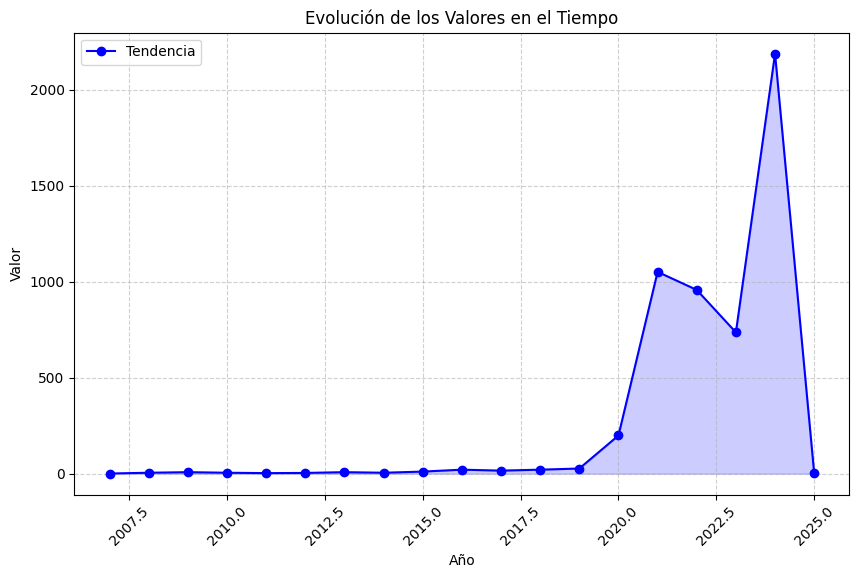

In [44]:
import matplotlib.pyplot as plt

# Datos
data = [
    {'name': '2007', 'y': 1},
    {'name': '2008', 'y': 5},
    {'name': '2009', 'y': 8},
    {'name': '2010', 'y': 5},
    {'name': '2011', 'y': 3},
    {'name': '2012', 'y': 4},
    {'name': '2013', 'y': 8},
    {'name': '2014', 'y': 5},
    {'name': '2015', 'y': 11},
    {'name': '2016', 'y': 21},
    {'name': '2017', 'y': 16},
    {'name': '2018', 'y': 21},
    {'name': '2019', 'y': 27},
    {'name': '2020', 'y': 199},
    {'name': '2021', 'y': 1051},
    {'name': '2022', 'y': 957},
    {'name': '2023', 'y': 736},
    {'name': '2024', 'y': 2187},
    {'name': '2025', 'y': 3}
]

# Convertir a listas
years = [int(item['name']) for item in data]
values = [item['y'] for item in data]

# Crear gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(years, values, marker='o', linestyle='-', color='b', label="Tendencia")
plt.fill_between(years, values, alpha=0.2, color='blue')  # Área bajo la curva

# Etiquetas y título
plt.xlabel("Año")
plt.ylabel("Valor")
plt.title("Evolución de los Valores en el Tiempo")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Mostrar gráfico
plt.show()


In [93]:
agrupado_año_clientes_seg_conteo_total_anual = (
    df_productos.groupby(["CODIGO_TIPO_IDENTIFICACION","AÑO_REGISTRO"], as_index=False)
    .agg(
        numero_clientes_activos = ("NOMBRE_COMPLETO/RAZON_SOCIAL", 'nunique'),
        conteo_productos_año = ("PRODUCTO", "count"),
    ).assign(promeido_productos_x_cliente = lambda df: round(df['conteo_productos_año'] / df['numero_clientes_activos']))
).sort_values("AÑO_REGISTRO", ascending=True)

In [94]:
path="/home/ale1726/proyects/datalake/clientes/data/productos/SIRAC/data/06_02_2025/agrupados"

agrupado_año_clientes_seg_conteo_total_anual.to_csv(os.path.join(path,'agrupado_año_clientes_seg_conteo_total_anual.csv'), index=False)

In [64]:
years = sorted(agrupado_año_clientes_seg_conteo_total_anual["AÑO_REGISTRO"].unique())

In [66]:
ag_fis_cscta = agrupado_año_clientes_seg_conteo_total_anual[agrupado_año_clientes_seg_conteo_total_anual["CODIGO_TIPO_IDENTIFICACION"] == 5]
ag_moral_cscta = agrupado_año_clientes_seg_conteo_total_anual[agrupado_año_clientes_seg_conteo_total_anual["CODIGO_TIPO_IDENTIFICACION"] == 7]


In [67]:
ag2_fis = {
    str(key):values
    for key, values in zip(ag_fis_cscta["AÑO_REGISTRO"], ag_fis_cscta["numero_clientes_activos"])
}

In [68]:
ag2_moral = {
    str(key):values
    for key, values in zip(ag_moral_cscta["AÑO_REGISTRO"], ag_moral_cscta["numero_clientes_activos"])
}

In [69]:
data_grap_comp = {
    "categories": years,    
    "seriefisica": [ag2_fis.get(str(year),0) for year in years],
    "seriemoral": [ag2_moral.get(str(year),0) for year in years]
    
}

In [15]:
agrupado_año_clientes_conte_total_mensual = (
    df_productos.groupby(["AÑO_REGISTRO","MES_REGISTRO"], as_index=False)
    .agg(
        numero_clientes_activos = ("NOMBRE_COMPLETO/RAZON_SOCIAL", 'nunique'),
        conteo_productos_año = ("DESC_LINEA_FINANCIERA", "count"),
    ).assign(promeido_productos_x_cliente = lambda df: round(df['conteo_productos_año'] / df['numero_clientes_activos']))
).sort_values("AÑO_REGISTRO", ascending=True)

In [72]:
df_productos.columns

Index(['CODIGO_CLIENTE', 'CODIGO_TIPO_IDENTIFICACION', 'NOMBRES',
       'PRIMER_APELLIDO', 'SEGUNDO_APELLIDO', 'SEXO', 'FECHA_DE_NACIMIENTO',
       'RAZON_SOCIAL', 'NOMBRE_COMERCIAL', 'NO_EMPLEADOS', 'VENTAS_NETAS',
       'PAIS', 'NACIONALIDAD', 'DELEGACION_MUNICIPIO', 'ENTIDAD_FEDERATIVA',
       'TIPO_SECTOR', 'TIPO_SUBSECTOR', 'TIPO_RAMA', 'TIPO_CLASE',
       'NUMERO_CONTRATO', 'NUMERO_PRESTAMO', 'FECHA_APERTURA', 'AÑO_REGISTRO',
       'MES_REGISTRO', 'DIA_REGISTRO', 'FECHA_VENCIMIENTO', 'AÑO_VENCIMIENTO',
       'MES_VENCIMIENTO', 'DIA_VENCIMIENTO', 'PRODUCTO',
       'DESC_LINEA_FINANCIERA', 'CODIGO_MONEDA', 'MONTO_APROBADO',
       'MONTO_DISPONIBLE', 'MONTO_INICIAL', 'TIPO_TASA', 'TASA_TOTAL', 'PLAZO',
       'CODIGO_TIPO_AMORTIZACION', 'AMORTIZACION', 'NUMERO_CUOTAS',
       'VALOR_CUOTA', 'CANTIDAD_CUOTAS_PAGADAS',
       'NOMBRE_COMPLETO/RAZON_SOCIAL'],
      dtype='object')

In [199]:
agrupado_producto_monto_all = (
    df_productos.groupby(['PRODUCTO'], as_index=False)
    .agg(
        monto_aprobado_total = ('MONTO_APROBADO', 'sum'),
        cantidad_lineas = ("PRODUCTO",'count'),
        monto_maximo = ("MONTO_APROBADO", "max"),
        monto_minimo = ('MONTO_APROBADO','min'),
        numero_clientes_activos = ("NOMBRE_COMPLETO/RAZON_SOCIAL", 'nunique')
    ).assign(promedio_monto_total_x_producto = lambda df: round(df['monto_aprobado_total'] / df['cantidad_lineas']))
).sort_values(by=['monto_aprobado_total'])

In [110]:
path="/home/ale1726/proyects/datalake/clientes/data/productos/SIRAC/data/06_02_2025/agrupados"

agrupado_producto_monto_all.to_csv(os.path.join(path,'agrupado_producto_monto_all.csv'), index=False)

In [200]:
agrupado_producto_monto_seg_moneda = (
    df_productos.groupby(['PRODUCTO', 'CODIGO_MONEDA'], as_index=False)
    .agg(
        monto_aprobado_total = ('MONTO_APROBADO', 'sum'),
        cantidad_lineas = ("PRODUCTO",'count'),
        monto_maximo = ("MONTO_APROBADO", "max"),
        monto_minimo = ('MONTO_APROBADO','min'),
        numero_clientes_activos = ("NOMBRE_COMPLETO/RAZON_SOCIAL", 'nunique')
    ).assign(promedio_monto_total_x_producto = lambda df: round(df['monto_aprobado_total'] / df['cantidad_lineas']))
).sort_values(by=['monto_aprobado_total'])

In [201]:
agrupado_producto_monto_seg_moneda

,PRODUCTO,CODIGO_MONEDA,monto_aprobado_total,cantidad_lineas,monto_maximo,monto_minimo,numero_clientes_activos,promedio_monto_total_x_producto
2,"2DO. PISO, DLLS. REFACCIONARIO MAQ, Y EQ",54,2.300000e+05,1,2.300000e+05,2.300000e+05,1,2.300000e+05
25,SIN GARANTIA HIPOTECARIA,1,2.888862e+05,4,1.130991e+05,2.443452e+04,4,7.222200e+04
13,MEDIANO PLAZO,1,2.206029e+06,14,2.798484e+05,3.010849e+04,14,1.575730e+05
16,REESTRUCTURACION,1,4.806921e+06,13,8.845687e+05,8.490431e+04,13,3.697630e+05
1,"2DO. PISO, DLLS. REESTRUCTURACION PASIVO",54,5.640000e+06,1,5.640000e+06,5.640000e+06,1,5.640000e+06
5,"2DO. PISO, M.N. REESTRUCTURACION PASIVOS",1,5.640000e+06,1,5.640000e+06,5.640000e+06,1,5.640000e+06
15,REESTRUCTURA HIPOTECARIO VIVIENDA,1,9.094501e+06,7,3.095951e+06,2.332889e+05,7,1.299214e+06
14,REDOCUMENTACION CONSUMO F.,1,1.216767e+07,37,8.252082e+05,2.382160e+04,37,3.288560e+05
3,"2DO. PISO, DLLS. SIMPLE",54,1.326760e+07,9,4.320000e+06,6.000000e+02,6,1.474178e+06
11,HIPOTECARIO PARA VIVIENDA,1,1.200756e+08,67,4.377903e+06,1.993800e+02,60,1.792173e+06


In [ ]:
data_ambos_mx = agrupado_producto_monto_seg_moneda[agrupado_producto_monto_seg_moneda["CODIGO_MONEDA"] == 1]
data_ambos_usd = agrupado_producto_monto_seg_moneda[agrupado_producto_monto_seg_moneda["CODIGO_MONEDA"] == 54]


In [208]:
agrupado_producto_monto_seg_moneda_persona = (
    df_productos.groupby(['PRODUCTO', 'CODIGO_TIPO_IDENTIFICACION' ,'CODIGO_MONEDA'], as_index=False)
    .agg(
        monto_aprobado_total = ('MONTO_APROBADO', 'sum'),
        cantidad_lineas = ("PRODUCTO",'count'),
        monto_maximo = ("MONTO_APROBADO", "max"),
        monto_minimo = ('MONTO_APROBADO','min'),
        numero_clientes_activos = ("NOMBRE_COMPLETO/RAZON_SOCIAL", 'nunique')
    ).assign(promedio_monto_total_x_producto = lambda df: round(df['monto_aprobado_total'] / df['cantidad_lineas']))
).sort_values(by=['monto_aprobado_total'])

In [209]:
agrupado_producto_monto_seg_moneda_persona

,PRODUCTO,CODIGO_TIPO_IDENTIFICACION,CODIGO_MONEDA,monto_aprobado_total,cantidad_lineas,monto_maximo,monto_minimo,numero_clientes_activos,promedio_monto_total_x_producto
0,"2DO. PISO, DLLS. HABILITACION O AVIO",5,54,8.158200e+02,1,8.158200e+02,8.158200e+02,1,8.160000e+02
3,"2DO. PISO, DLLS. REFACCIONARIO MAQ, Y EQ",7,54,2.300000e+05,1,2.300000e+05,2.300000e+05,1,2.300000e+05
29,SIN GARANTIA HIPOTECARIA,5,1,2.888862e+05,4,1.130991e+05,2.443452e+04,4,7.222200e+04
17,MEDIANO PLAZO,5,1,2.206029e+06,14,2.798484e+05,3.010849e+04,14,1.575730e+05
20,REESTRUCTURACION,5,1,4.806921e+06,13,8.845687e+05,8.490431e+04,13,3.697630e+05
7,"2DO. PISO, M.N. REESTRUCTURACION PASIVOS",7,1,5.640000e+06,1,5.640000e+06,5.640000e+06,1,5.640000e+06
2,"2DO. PISO, DLLS. REESTRUCTURACION PASIVO",7,54,5.640000e+06,1,5.640000e+06,5.640000e+06,1,5.640000e+06
19,REESTRUCTURA HIPOTECARIO VIVIENDA,5,1,9.094501e+06,7,3.095951e+06,2.332889e+05,7,1.299214e+06
18,REDOCUMENTACION CONSUMO F.,5,1,1.216767e+07,37,8.252082e+05,2.382160e+04,37,3.288560e+05
4,"2DO. PISO, DLLS. SIMPLE",7,54,1.326760e+07,9,4.320000e+06,6.000000e+02,6,1.474178e+06


In [210]:
data_pf_cualquiera =  agrupado_producto_monto_seg_moneda_persona[agrupado_producto_monto_seg_moneda_persona["CODIGO_TIPO_IDENTIFICACION"] == 5]

data_pf_mx =  agrupado_producto_monto_seg_moneda_persona[(agrupado_producto_monto_seg_moneda_persona["CODIGO_TIPO_IDENTIFICACION"] == 5) &
                                                         (agrupado_producto_monto_seg_moneda_persona["CODIGO_MONEDA"] == 1)
                                                         ]
data_pf_usd =  agrupado_producto_monto_seg_moneda_persona[(agrupado_producto_monto_seg_moneda_persona["CODIGO_TIPO_IDENTIFICACION"] == 5) &
                                                         (agrupado_producto_monto_seg_moneda_persona["CODIGO_MONEDA"] == 54)
                                                         ]



data_pm_cualquiera =  agrupado_producto_monto_seg_moneda_persona[agrupado_producto_monto_seg_moneda_persona["CODIGO_TIPO_IDENTIFICACION"] == 7]


data_pm_mx =  agrupado_producto_monto_seg_moneda_persona[(agrupado_producto_monto_seg_moneda_persona["CODIGO_TIPO_IDENTIFICACION"] == 7) &
                                                         (agrupado_producto_monto_seg_moneda_persona["CODIGO_MONEDA"] == 1)
                                                         ]


data_pm_usd =  agrupado_producto_monto_seg_moneda_persona[(agrupado_producto_monto_seg_moneda_persona["CODIGO_TIPO_IDENTIFICACION"] == 7) &
                                                          (agrupado_producto_monto_seg_moneda_persona["CODIGO_MONEDA"] == 54)
                                                         ]


In [ ]:
del agrupado_producto_monto_seg_moneda, agrupado_producto_monto_seg_moneda_persona, data_ambos_mx
del data_ambos_usd, data_pf_cualquiera, data_pf_mx, data_pf_usd, data_pm_cualquiera, data_pm_mx, data_pm_usd

In [204]:
df_productos.columns

Index(['CODIGO_CLIENTE', 'CODIGO_TIPO_IDENTIFICACION', 'NOMBRES',
       'PRIMER_APELLIDO', 'SEGUNDO_APELLIDO', 'SEXO', 'FECHA_DE_NACIMIENTO',
       'RAZON_SOCIAL', 'NOMBRE_COMERCIAL', 'NO_EMPLEADOS', 'VENTAS_NETAS',
       'PAIS', 'NACIONALIDAD', 'DELEGACION_MUNICIPIO', 'ENTIDAD_FEDERATIVA',
       'TIPO_SECTOR', 'TIPO_SUBSECTOR', 'TIPO_RAMA', 'TIPO_CLASE',
       'NUMERO_CONTRATO', 'NUMERO_PRESTAMO', 'FECHA_APERTURA', 'AÑO_REGISTRO',
       'MES_REGISTRO', 'DIA_REGISTRO', 'FECHA_VENCIMIENTO', 'AÑO_VENCIMIENTO',
       'MES_VENCIMIENTO', 'DIA_VENCIMIENTO', 'PRODUCTO',
       'DESC_LINEA_FINANCIERA', 'CODIGO_MONEDA', 'MONTO_APROBADO',
       'MONTO_DISPONIBLE', 'MONTO_INICIAL', 'TIPO_TASA', 'TASA_TOTAL', 'PLAZO',
       'CODIGO_TIPO_AMORTIZACION', 'AMORTIZACION', 'NUMERO_CUOTAS',
       'VALOR_CUOTA', 'CANTIDAD_CUOTAS_PAGADAS',
       'NOMBRE_COMPLETO/RAZON_SOCIAL', 'GANANCIA'],
      dtype='object')

In [ ]:
df_productos["CODIGO_MONEDA"]

In [196]:
[agrupado_producto_monto_all.loc[agrupado_producto_monto_all["monto_maximo"].idxmax(), "PRODUCTO"],
 formato_numero(int(agrupado_producto_monto_all.loc[agrupado_producto_monto_all["monto_maximo"].idxmax(), "monto_maximo"]))]

['CREDITOS FIDETEQ', '31.54B']

In [198]:
[agrupado_producto_monto_all.loc[agrupado_producto_monto_all["monto_minimo"].idxmin(), "PRODUCTO"],
 formato_numero(int(agrupado_producto_monto_all.loc[agrupado_producto_monto_all["monto_minimo"].idxmin(), "monto_minimo"]))]

['2DO. PISO, M.N. HABILITACION O AVIO', '19.00']

In [ ]:
agrupado_producto_monto_segfm = (
    df_productos.groupby(["CODIGO_TIPO_IDENTIFICACION", 'DESC_LINEA_FINANCIERA'], as_index=False)
    .agg(
        monto_total = ('MONTO_APROBADO', 'sum'),
        numero_clientes_activos = ("NOMBRE_COMPLETO/RAZON_SOCIAL", 'nunique')
    ).assign(promeido_productos_x_cliente = lambda df: round(df['monto_total'] / df['numero_clientes_activos']))
).sort_values(by=["CODIGO_TIPO_IDENTIFICACION",'monto_total'])

In [107]:
df_productos.columns

Index(['CODIGO_CLIENTE', 'CODIGO_TIPO_IDENTIFICACION', 'NOMBRES',
       'PRIMER_APELLIDO', 'SEGUNDO_APELLIDO', 'SEXO', 'FECHA_DE_NACIMIENTO',
       'RAZON_SOCIAL', 'NOMBRE_COMERCIAL', 'NO_EMPLEADOS', 'VENTAS_NETAS',
       'PAIS', 'NACIONALIDAD', 'DELEGACION_MUNICIPIO', 'ENTIDAD_FEDERATIVA',
       'TIPO_SECTOR', 'TIPO_SUBSECTOR', 'TIPO_RAMA', 'TIPO_CLASE',
       'NUMERO_CONTRATO', 'NUMERO_PRESTAMO', 'FECHA_APERTURA', 'AÑO_REGISTRO',
       'MES_REGISTRO', 'DIA_REGISTRO', 'FECHA_VENCIMIENTO', 'AÑO_VENCIMIENTO',
       'MES_VENCIMIENTO', 'DIA_VENCIMIENTO', 'PRODUCTO',
       'DESC_LINEA_FINANCIERA', 'CODIGO_MONEDA', 'MONTO_APROBADO',
       'MONTO_DISPONIBLE', 'MONTO_INICIAL', 'TIPO_TASA', 'TASA_TOTAL', 'PLAZO',
       'CODIGO_TIPO_AMORTIZACION', 'AMORTIZACION', 'NUMERO_CUOTAS',
       'VALOR_CUOTA', 'CANTIDAD_CUOTAS_PAGADAS',
       'NOMBRE_COMPLETO/RAZON_SOCIAL', 'GANANCIA'],
      dtype='object')

In [ ]:
agrupado_producto_monto_all = (
    df_productos.groupby(['PRODUCTO','TIPO_SECTOR'], as_index=False)
    .agg(
        monto_aprobado_total = ('MONTO_APROBADO', 'sum'),
        cantidad_lineas = ("PRODUCTO",'count'),
        monto_maximo = ("MONTO_APROBADO", "max"),
        monto_minimo = ('MONTO_APROBADO','min'),
        numero_clientes_activos = ("NOMBRE_COMPLETO/RAZON_SOCIAL", 'nunique')
    ).assign(promedio_monto_total_x_producto = lambda df: round(df['monto_aprobado_total'] / df['cantidad_lineas']))
).sort_values(by=['monto_aprobado_total'])

## Clientes fisicos

In [ ]:
df_productos_copy_1 = df_productos.copy() 

In [119]:
clt_fisicos =  df_productos[df_productos["CODIGO_TIPO_IDENTIFICACION"] == 5].copy()

In [120]:
clt_fisicos

,CODIGO_CLIENTE,CODIGO_TIPO_IDENTIFICACION,NOMBRES,PRIMER_APELLIDO,SEGUNDO_APELLIDO,SEXO,FECHA_DE_NACIMIENTO,RAZON_SOCIAL,NOMBRE_COMERCIAL,NO_EMPLEADOS,...,TIPO_TASA,TASA_TOTAL,PLAZO,CODIGO_TIPO_AMORTIZACION,AMORTIZACION,NUMERO_CUOTAS,VALOR_CUOTA,CANTIDAD_CUOTAS_PAGADAS,NOMBRE_COMPLETO/RAZON_SOCIAL,GANANCIA
287,651656,5,ISIDRO ERNESTO,CONDE,CORONADO,M,1967-03-16 00:00:00,NaN,NaN,5,...,6.0,11.2753,120.0,1.0,CAPITAL E INTERES AL VCTO,1.0,18650.72,0.0,ISIDRO ERNESTO CONDE CORONADO,704.40
441,795368,5,JESUS,GONZALEZ,VAZQUEZ,M,1955-03-11 00:00:00,NaN,NaN,5,...,6.0,11.7074,144.0,1.0,CAPITAL E INTERES AL VCTO,1.0,34776.05,0.0,JESUS GONZALEZ VAZQUEZ,1555.20
442,795368,5,JESUS,GONZALEZ,VAZQUEZ,M,1955-03-11 00:00:00,NaN,NaN,5,...,6.0,11.6871,139.0,1.0,CAPITAL E INTERES AL VCTO,1.0,32921.61,0.0,JESUS GONZALEZ VAZQUEZ,1421.97
443,795368,5,JESUS,GONZALEZ,VAZQUEZ,M,1955-03-11 00:00:00,NaN,NaN,5,...,6.0,11.7074,144.0,1.0,CAPITAL E INTERES AL VCTO,1.0,20317.07,0.0,JESUS GONZALEZ VAZQUEZ,908.64
444,795368,5,JESUS,GONZALEZ,VAZQUEZ,M,1955-03-11 00:00:00,NaN,NaN,5,...,6.0,11.7074,144.0,1.0,CAPITAL E INTERES AL VCTO,1.0,15494.01,0.0,JESUS GONZALEZ VAZQUEZ,692.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22779,28950781,5,AURORA,GONGORA,RODRIGUEZ,F,1990-10-01 00:00:00,NaN,NaN,1,...,0.0,11.6600,1788.0,5.0,PLAN DE PAGOS,30.0,3795.52,0.0,AURORA GONGORA RODRIGUEZ,-66584.40
22780,28950790,5,MARIO ALBERTO,CASTILLON,RIOS,M,1966-07-17 00:00:00,NaN,NaN,1,...,0.0,11.6600,1788.0,5.0,PLAN DE PAGOS,30.0,2757.88,0.0,MARIO ALBERTO CASTILLON RIOS,-48379.86
22781,28950852,5,FIDEL,JOSE,JULIO,M,1980-08-27 00:00:00,NaN,NaN,10,...,6.0,11.7440,112.0,1.0,CAPITAL E INTERES AL VCTO,1.0,1933318.81,0.0,FIDEL JOSE JULIO,68147.52
22782,28951011,5,MARIO,RODRIGUEZ,CAMBRON,M,1968-07-17 00:00:00,NaN,NaN,1,...,0.0,11.6600,1788.0,5.0,PLAN DE PAGOS,30.0,2517.97,0.0,MARIO RODRIGUEZ CAMBRON,-44161.56


In [121]:
agrupado_año_clientes_conte_cf = (
    clt_fisicos.groupby(["AÑO_REGISTRO"], as_index=False)
    .agg(
        numero_clientes_activos = ("NOMBRE_COMPLETO/RAZON_SOCIAL", 'nunique'),
        conteo_productos_año = ("DESC_LINEA_FINANCIERA", "count"),
    ).assign(promeido_productos_x_cliente = lambda df: round(df['conteo_productos_año'] / df['numero_clientes_activos']))
).sort_values("AÑO_REGISTRO", ascending=True)

## Clientes Morales

In [124]:
df_productos

,CODIGO_CLIENTE,CODIGO_TIPO_IDENTIFICACION,NOMBRES,PRIMER_APELLIDO,SEGUNDO_APELLIDO,SEXO,FECHA_DE_NACIMIENTO,RAZON_SOCIAL,NOMBRE_COMERCIAL,NO_EMPLEADOS,...,TIPO_TASA,TASA_TOTAL,PLAZO,CODIGO_TIPO_AMORTIZACION,AMORTIZACION,NUMERO_CUOTAS,VALOR_CUOTA,CANTIDAD_CUOTAS_PAGADAS,NOMBRE_COMPLETO/RAZON_SOCIAL,GANANCIA
0,63041,7,NaN,NaN,NaN,NaN,NaN,LAMINA DESPLEGADA SA DE CV,LAMINA DESPLEGADA SA DE CV,767,...,5.0,11.3234,519.0,5.0,PLAN DE PAGOS,17.0,84079.47,11.0,LAMINA DESPLEGADA SA DE CV,48198.70
1,99003,7,NaN,NaN,NaN,NaN,NaN,CAFE EL MARINO,CAFE EL MARINO,249,...,6.0,12.7549,153.0,1.0,CAPITAL E INTERES AL VCTO,1.0,16784.21,0.0,CAFE EL MARINO,862.92
2,99003,7,NaN,NaN,NaN,NaN,NaN,CAFE EL MARINO,CAFE EL MARINO,249,...,6.0,12.6743,146.0,1.0,CAPITAL E INTERES AL VCTO,1.0,6189.19,0.0,CAFE EL MARINO,302.22
3,99003,7,NaN,NaN,NaN,NaN,NaN,CAFE EL MARINO,CAFE EL MARINO,249,...,6.0,12.6743,132.0,1.0,CAPITAL E INTERES AL VCTO,1.0,6206.43,0.0,CAFE EL MARINO,275.88
4,123173,7,NaN,NaN,NaN,NaN,NaN,"SCHETTINO HERMANOS, S. DE R.L. DE C.V.","SCHETTINO HERMANOS, S. DE R.L. DE C.V.",281,...,6.0,12.1024,176.0,1.0,CAPITAL E INTERES AL VCTO,1.0,98615.80,0.0,"SCHETTINO HERMANOS, S. DE R.L. DE C.V.",5508.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22783,28951280,5,BRENDA,VAZQUEZ,ESPINOSA,F,1995-09-19 00:00:00,NaN,NaN,1,...,0.0,11.6600,1788.0,5.0,PLAN DE PAGOS,30.0,1172.65,0.0,BRENDA VAZQUEZ ESPINOSA,-20560.86
22784,28951682,7,NaN,NaN,NaN,NaN,NaN,PRUEBAS SAPI DE CV SOFOM ER,PRUEBAS S.A.P.I. DE C.V. S.O.F.O.M.E.R.,8,...,5.0,12.2408,273.0,2.0,INT. MENSUAL Y CAP. AL VENC.,1.0,5464130.03,NaN,PRUEBAS SAPI DE CV SOFOM ER,464130.03
22785,28958014,7,NaN,NaN,NaN,NaN,NaN,OPERACION Y MANTENIMIENTO A ESTACIONES DE GAS ...,OMEGAS,19,...,5.0,6.7890,365.0,2.0,INT. MENSUAL Y CAP. AL VENC.,4.0,173496.36,NaN,OPERACION Y MANTENIMIENTO A ESTACIONES DE GAS ...,-9306014.56
22786,28958014,7,NaN,NaN,NaN,NaN,NaN,OPERACION Y MANTENIMIENTO A ESTACIONES DE GAS ...,OMEGAS,19,...,5.0,6.7976,396.0,2.0,INT. MENSUAL Y CAP. AL VENC.,13.0,117069.64,NaN,OPERACION Y MANTENIMIENTO A ESTACIONES DE GAS ...,-18478094.68


In [122]:
clt_morales =  df_productos[df_productos["CODIGO_TIPO_AMORTIZACION"] == 7].copy()

In [123]:
clt_morales

,CODIGO_CLIENTE,CODIGO_TIPO_IDENTIFICACION,NOMBRES,PRIMER_APELLIDO,SEGUNDO_APELLIDO,SEXO,FECHA_DE_NACIMIENTO,RAZON_SOCIAL,NOMBRE_COMERCIAL,NO_EMPLEADOS,...,TIPO_TASA,TASA_TOTAL,PLAZO,CODIGO_TIPO_AMORTIZACION,AMORTIZACION,NUMERO_CUOTAS,VALOR_CUOTA,CANTIDAD_CUOTAS_PAGADAS,NOMBRE_COMPLETO/RAZON_SOCIAL,GANANCIA


In [ ]:
agrupado_año_clientes_conte_cf = (
    clt_morales.groupby(["AÑO_REGISTRO"], as_index=False)
    .agg(
        numero_clientes_activos = ("NOMBRE_COMPLETO/RAZON_SOCIAL", 'nunique'),
        conteo_productos_año = ("DESC_LINEA_FINANCIERA", "count"),
    ).assign(promeido_productos_x_cliente = lambda df: round(df['conteo_productos_año'] / df['numero_clientes_activos']))
).sort_values("AÑO_REGISTRO", ascending=True)

In [7]:
df_productos.columns

Index(['CODIGO_CLIENTE', 'CODIGO_TIPO_IDENTIFICACION', 'NOMBRES',
       'PRIMER_APELLIDO', 'SEGUNDO_APELLIDO', 'SEXO', 'FECHA_DE_NACIMIENTO',
       'RAZON_SOCIAL', 'NOMBRE_COMERCIAL', 'NO_EMPLEADOS', 'VENTAS_NETAS',
       'PAIS', 'NACIONALIDAD', 'DELEGACION_MUNICIPIO', 'ENTIDAD_FEDERATIVA',
       'TIPO_SECTOR', 'TIPO_SUBSECTOR', 'TIPO_RAMA', 'TIPO_CLASE',
       'NUMERO_CONTRATO', 'NUMERO_PRESTAMO', 'FECHA_APERTURA', 'AÑO_REGISTRO',
       'MES_REGISTRO', 'DIA_REGISTRO', 'FECHA_VENCIMIENTO', 'AÑO_VENCIMIENTO',
       'MES_VENCIMIENTO', 'DIA_VENCIMIENTO', 'PRODUCTO',
       'DESC_LINEA_FINANCIERA', 'CODIGO_MONEDA', 'MONTO_APROBADO',
       'MONTO_DISPONIBLE', 'MONTO_INICIAL', 'TIPO_TASA', 'TASA_TOTAL', 'PLAZO',
       'CODIGO_TIPO_AMORTIZACION', 'AMORTIZACION', 'NUMERO_CUOTAS',
       'VALOR_CUOTA', 'CANTIDAD_CUOTAS_PAGADAS',
       'NOMBRE_COMPLETO/RAZON_SOCIAL'],
      dtype='object')

In [60]:
agrupado_año_clientes_seg_prod = (
    df_productos.groupby(["AÑO_REGISTRO", "CODIGO_TIPO_IDENTIFICACION", "NOMBRE_COMPLETO/RAZON_SOCIAL"], as_index=False)
    .agg(
        PRODUCTOS=("DESC_LINEA_FINANCIERA", "count"),
        TOTAL_MONTO_NO_FORMATEADO=("MONTO_INICIAL", "sum"),  
        TOTAL_MONTO=("MONTO_INICIAL", "sum"),  
        SECTOR=('TIPO_SECTOR', lambda x: "| ".join(x.unique())),
        MONTO_MAXIMO=("MONTO_INICIAL", "max"),
        MONTO_MINIMO=("MONTO_INICIAL", "min")
    )
    .assign(
        TIPO_PERSONA=lambda df: df["CODIGO_TIPO_IDENTIFICACION"].apply(lambda x: "PERSONA FÍSICA" if x == 5 else "MORAL"),
        PROMEDIO_MONTO=lambda df: df["TOTAL_MONTO"] / df["PRODUCTOS"]
    )
)

agrupado_año_clientes_seg_prod["TOTAL_MONTO"] = agrupado_año_clientes_seg_prod["TOTAL_MONTO"].apply(lambda x: "{:,.2f}".format(float(x)))
agrupado_año_clientes_seg_prod["PROMEDIO_MONTO"] = agrupado_año_clientes_seg_prod["PROMEDIO_MONTO"].apply(lambda x: "{:,.2f}".format(float(x)) if pd.notna(x) else "0.00")
agrupado_año_clientes_seg_prod["MONTO_MAXIMO"] = agrupado_año_clientes_seg_prod["MONTO_MAXIMO"].apply(lambda x: "{:,.2f}".format(float(x)) if pd.notna(x) else "0.00")
agrupado_año_clientes_seg_prod["MONTO_MINIMO"] = agrupado_año_clientes_seg_prod["MONTO_MINIMO"].apply(lambda x: "{:,.2f}".format(float(x)) if pd.notna(x) else "0.00")



In [18]:
agrupado_año_clientes[agrupado_año_clientes["AÑO_REGISTRO"] == 2024]["conteo_productos_año"].idxmax()

4890

In [64]:
agrupado_año_clientes_seg_prod

,AÑO_REGISTRO,CODIGO_TIPO_IDENTIFICACION,NOMBRE_COMPLETO/RAZON_SOCIAL,PRODUCTOS,TOTAL_MONTO_NO_FORMATEADO,TOTAL_MONTO,SECTOR,MONTO_MAXIMO,MONTO_MINIMO,TIPO_PERSONA,PROMEDIO_MONTO
0,2007,5,OCTAVIO WILFRIDO RUBIO LIMON,1,1155364.53,"1,155,364.53",COMERCIO,"1,155,364.53","1,155,364.53",PERSONA FÍSICA,"1,155,364.53"
1,2008,5,BENITO HILARIO ZAMUDIO ESTRADA,1,235608.65,"235,608.65",COMERCIO,"235,608.65","235,608.65",PERSONA FÍSICA,"235,608.65"
2,2008,5,CECILIA GONZALEZ GASCA,1,464430.21,"464,430.21",COMERCIO,"464,430.21","464,430.21",PERSONA FÍSICA,"464,430.21"
3,2008,5,FRANCISCO QUIÑONES PARTIDA,2,2314175.21,"2,314,175.21",COMERCIO,"1,972,679.70","341,495.51",PERSONA FÍSICA,"1,157,087.60"
4,2008,5,HECTOR ALEJANDRO TOVAR SANTOS,1,1306944.80,"1,306,944.80",COMERCIO,"1,306,944.80","1,306,944.80",PERSONA FÍSICA,"1,306,944.80"
...,...,...,...,...,...,...,...,...,...,...,...
5263,2024,7,ZIGNO IMPRESOS SA DE CV,1,383628.24,"383,628.24",INDUSTRIAS MANUFACTURERAS,"383,628.24","383,628.24",MORAL,"383,628.24"
5264,2024,7,"ZYLKU IMPORTACIONES, S.A. DE C.V.",4,2275108.43,"2,275,108.43",COMERCIO,"1,487,077.44","216,047.01",MORAL,"568,777.11"
5265,2025,7,"MEX-FACTOR, S.A. DE C.V., SOFOM, E.N.R.",1,240.00,240.00,"SERVICIOS FINANCIEROS, DE ADMON Y ALQUILER DE ...",240.00,240.00,MORAL,240.00
5266,2025,7,OPERACION Y MANTENIMIENTO A ESTACIONES DE GAS ...,3,45000000.00,"45,000,000.00",MINERIA Y EXTRACCION DE PETROLEO,"20,000,000.00","10,000,000.00",MORAL,"15,000,000.00"


In [1]:
data_treemap_año_todos_product = {}; data_tree_año_todos_mayor_monto ={}
for año in agrupado_año_clientes_seg_prod["AÑO_REGISTRO"].unique():
    filtrer_df = agrupado_año_clientes_seg_prod[agrupado_año_clientes_seg_prod["AÑO_REGISTRO"]==año]
    filtrer_df = filtrer_df.nlargest(10, "PRODUCTOS")
    
    data_treemap_año_todos_product[str(año)] = [
        {"name":clt, "value": int(producto)}
        for clt, producto in zip(filtrer_df["NOMBRE_COMPLETO/RAZON_SOCIAL"],filtrer_df["PRODUCTOS"])
    ]
    data_tree_año_todos_mayor_monto[str(año)] = [
        {"name":clt, "value": int(monto)}
        for clt, monto in zip(filtrer_df["NOMBRE_COMPLETO/RAZON_SOCIAL"],filtrer_df["TOTAL_MONTO"])
    ]

NameError: name 'agrupado_año_clientes_seg_prod' is not defined

In [71]:
data_treemap_año_pf_product = {}
for año in agrupado_año_clientes_seg_prod["AÑO_REGISTRO"].unique():
    filtrer_df = agrupado_año_clientes_seg_prod[(agrupado_año_clientes_seg_prod["AÑO_REGISTRO"]==año) & 
                                                (agrupado_año_clientes_seg_prod["CODIGO_TIPO_IDENTIFICACION"]==5)]
    filtrer_df = filtrer_df.nlargest(10, "PRODUCTOS")
    
    data_treemap_año_pf_product[str(año)] = [
        {"name":clt, "value": int(producto)}
        for clt, producto in zip(filtrer_df["NOMBRE_COMPLETO/RAZON_SOCIAL"],filtrer_df["PRODUCTOS"])
    ]

In [ ]:
data_treemap_año_pm_product = {}
for año in agrupado_año_clientes_seg_prod["AÑO_REGISTRO"].unique():
    filtrer_df = agrupado_año_clientes_seg_prod[(agrupado_año_clientes_seg_prod["AÑO_REGISTRO"]==año) & 
                                                (agrupado_año_clientes_seg_prod["CODIGO_TIPO_IDENTIFICACION"]==7)]
    filtrer_df = filtrer_df.nlargest(10, "PRODUCTOS")
    
    data_treemap_año_pm_product[str(año)] = [
        {"name":clt, "value": int(producto)}
        for clt, producto in zip(filtrer_df["NOMBRE_COMPLETO/RAZON_SOCIAL"],filtrer_df["PRODUCTOS"])
    ]

In [75]:
data_treemap_año_pf_product['2023']

[{'name': 'IRMA MARCELA GONZALEZ SERNA', 'value': 7},
 {'name': 'FRANCISCO FLORES ARELLANO', 'value': 6},
 {'name': 'LEONEL BARRAZA DE LA TORRE', 'value': 6},
 {'name': 'OLGA LETICIA SANDOVAL GUTIERREZ', 'value': 4},
 {'name': 'CESAR MICHEL ARECHIGA', 'value': 3},
 {'name': 'LUIS CARLOS GUERRERO RODRIGUEZ', 'value': 3},
 {'name': 'MARIO RENATO CERVERA RIVERA', 'value': 3},
 {'name': 'NIVAD MENDOZA CAZORLA', 'value': 3},
 {'name': 'ROBERTO PRIETO RODRIGUEZ', 'value': 3},
 {'name': 'ANEL VERONICA FLORES TOVAR', 'value': 2}]

# Otros

In [ ]:
import matplotlib.pyplot as plt

# Obtener los años únicos
años_unicos = agrupado_año["AÑO_REGISTRO"].unique()

# Crear subgráficos en función de la cantidad de años
fig, axes = plt.subplots(len(años_unicos), 1, figsize=(10, 6 * len(años_unicos)), sharex=True)

# Si hay solo un año, convertir axes en lista para iterar
if len(años_unicos) == 1:
    axes = [axes]

# Iterar sobre cada año y graficar
for ax, año in zip(axes, años_unicos):
    df_año = agrupado_año[agrupado_año["AÑO_REGISTRO"] == año]
    ax.bar(df_año["MES_REGISTRO"], df_año["CLIENTES"], color='blue', alpha=0.7)
    ax.set_title(f"Año {año}")
    ax.set_ylabel("Número de Clientes")
    ax.set_xticks(range(1, 13))  # Asegurar que los meses sean del 1 al 12
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Etiqueta del eje X común
plt.xlabel("Mes de Registro")
plt.suptitle("Número de Clientes por Mes y Año", fontsize=16, y=1.02)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


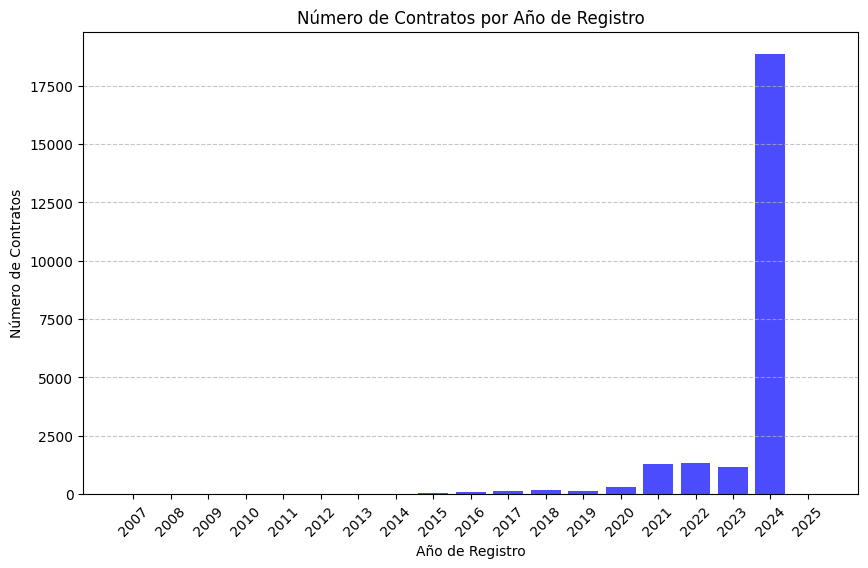

In [33]:
# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(agrupado_año["AÑO_REGISTRO"].astype(str), agrupado_año["NUMERO_CONTRATOS"], color='blue', alpha=0.7)

# Ajustes de la gráfica
plt.xlabel("Año de Registro")
plt.ylabel("Número de Contratos")
plt.title("Número de Contratos por Año de Registro")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.show()


In [31]:
agrupado_año[agrupado_año["AÑO_REGISTRO"] == 2025]

,AÑO_REGISTRO,MES_REGISTRO,CLIENTES,NUMERO_CONTRATOS,FECHA
148,2025,1,3,5,2025-01-01


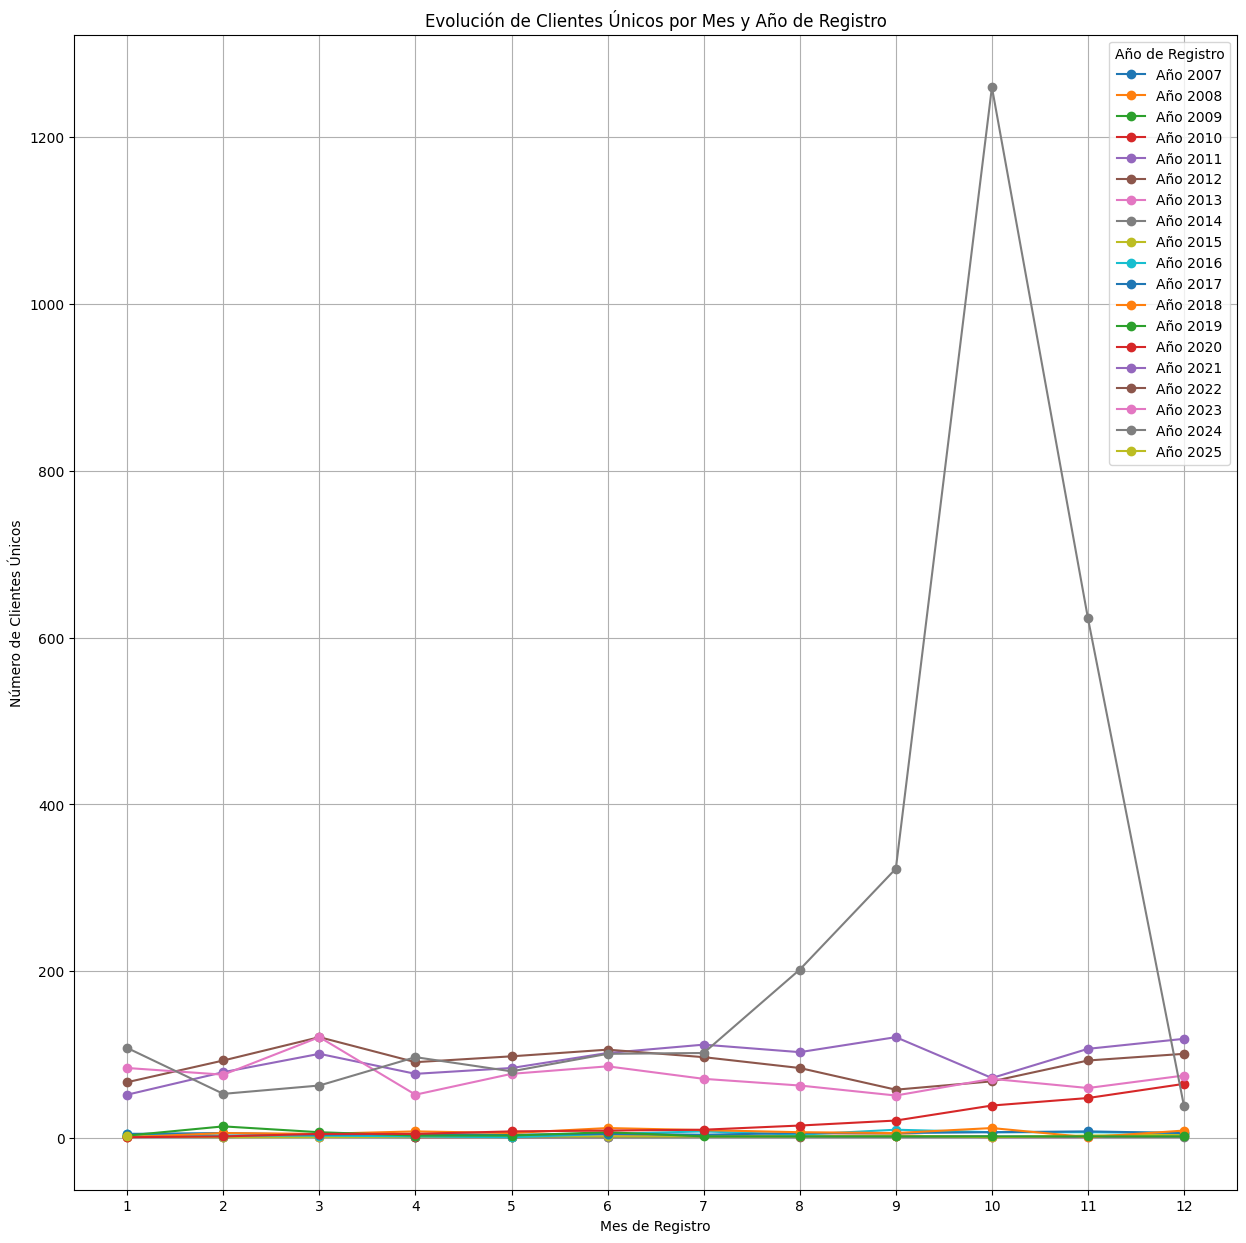

In [29]:
# Crear la gráfica de líneas con cada año como una línea separada
plt.figure(figsize=(15, 15))

# Obtener los años únicos
años_unicos = agrupado_año["AÑO_REGISTRO"].unique()

# Graficar cada año por separado
for año in años_unicos:
    df_año = agrupado_año[agrupado_año["AÑO_REGISTRO"] == año]
    plt.plot(df_año["MES_REGISTRO"], df_año["CLIENTES"], marker='o', linestyle='-', label=f"Año {año}")

# Ajustes de la gráfica
plt.xlabel("Mes de Registro")
plt.ylabel("Número de Clientes Únicos")
plt.title("Evolución de Clientes Únicos por Mes y Año de Registro")
plt.xticks(range(1, 13))  # Asegurar que los meses vayan del 1 al 12
plt.legend(title="Año de Registro")
plt.grid(True)

# Mostrar la gráfica
plt.show()



In [18]:
print(agrupado_año.to_string(max_rows=None))

     AÑO_REGISTRO  MES_REGISTRO  CLIENTES  NUMERO_CONTRATOS
0            2007             4         1                 1
1            2008             5         1                 1
2            2008             8         2                 3
3            2008             9         2                 2
4            2009             1         2                 3
5            2009             4         1                 1
6            2009             6         1                 2
7            2009             9         2                 2
8            2009            10         2                 2
9            2010             4         1                 1
10           2010             9         3                 6
11           2010            10         1                 1
12           2011             5         1                 1
13           2011            11         2                 2
14           2012             2         1                 1
15           2012             3         

In [ ]:
df_productos
    .groupby(['AÑO', 'MES'], as_index=False)
    .agg(
        INTERMEDIARIOS=('CODIGO_CLIENTE', 'nunique'),  # Número de clientes distintos
        GARANTIAS=('NUMERO_DE_GARANTIA', 'count'),  # Número total de garantías
        SUMA_MENSUAL_MONTO_GARANTIZADO = ('MONTO_GARANTIZADO', 'sum'),
        TOTAL_MENSUAL_GANANCIA = ('GANANCIA','sum'),
        PROMEDIO_MENSUAL_COMISION = ('PORCENTAJE_COMISION',lambda x: round(x.mean() , 4))
    ).sort_values(by=['AÑO', 'MES'])

In [7]:
df_productos[df_productos.duplicated(subset=("CODIGO_CLIENTE"))]

,CODIGO_CLIENTE,CODIGO_TIPO_IDENTIFICACION,NOMBRES,PRIMER_APELLIDO,SEGUNDO_APELLIDO,SEXO,FECHA_DE_NACIMIENTO,RAZON_SOCIAL,NOMBRE_COMERCIAL,NO_EMPLEADOS,...,MONTO_DISPONIBLE,MONTO_INICIAL,TIPO_TASA,TASA_TOTAL,PLAZO,CODIGO_TIPO_AMORTIZACION,AMORTIZACION,NUMERO_CUOTAS,VALOR_CUOTA,CANTIDAD_CUOTAS_PAGADAS
2,99003,7,NaN,NaN,NaN,NaN,NaN,CAFE EL MARINO,CAFE EL MARINO,249,...,0.0,5886.97,6.0,12.6743,146.0,1.0,CAPITAL E INTERES AL VCTO,1.0,6189.19,0.0
3,99003,7,NaN,NaN,NaN,NaN,NaN,CAFE EL MARINO,CAFE EL MARINO,249,...,0.0,5930.55,6.0,12.6743,132.0,1.0,CAPITAL E INTERES AL VCTO,1.0,6206.43,0.0
5,123173,7,NaN,NaN,NaN,NaN,NaN,"SCHETTINO HERMANOS, S. DE R.L. DE C.V.","SCHETTINO HERMANOS, S. DE R.L. DE C.V.",281,...,0.0,258057.03,6.0,11.6871,173.0,1.0,CAPITAL E INTERES AL VCTO,1.0,272550.97,0.0
7,128196,7,NaN,NaN,NaN,NaN,NaN,ALIMENTOS COMPEAN S.A. DE CV,ALIMENTOS COMPEAN S.A. DE CV,50,...,0.0,80915.74,6.0,12.1526,168.0,1.0,CAPITAL E INTERES AL VCTO,1.0,85503.82,0.0
8,128196,7,NaN,NaN,NaN,NaN,NaN,ALIMENTOS COMPEAN S.A. DE CV,ALIMENTOS COMPEAN S.A. DE CV,50,...,0.0,41021.74,6.0,12.1526,168.0,1.0,CAPITAL E INTERES AL VCTO,1.0,43348.54,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23398,28949177,5,MARGARITA,PARADA,RUVALCABA,F,1972-09-07 00:00:00,NaN,NaN,4,...,0.0,501935.00,6.0,11.7283,168.0,1.0,CAPITAL E INTERES AL VCTO,1.0,529406.36,0.0
23417,28950290,7,NaN,NaN,NaN,NaN,NaN,MURANO PV S.A DE C.V.,MURANO PV S.A DE C.V.,1,...,0.0,2087953.60,5.0,8.3672,1084.0,2.0,INT. MENSUAL Y CAP. AL VENC.,12.0,31058.56,0.0
23427,28950656,5,GEORGINA ALEJANDRA,DE AGUINAGA,INURRIAGA,F,2000-01-19 00:00:00,NaN,NaN,1,...,0.0,133327.15,0.0,11.6600,1795.0,5.0,PLAN DE PAGOS,30.0,2804.63,0.0
23438,28958014,7,NaN,NaN,NaN,NaN,NaN,OPERACION Y MANTENIMIENTO A ESTACIONES DE GAS ...,OMEGAS,19,...,0.0,20000000.00,5.0,6.7976,396.0,2.0,INT. MENSUAL Y CAP. AL VENC.,13.0,117069.64,NaN
